In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import time
import sklearn
from tqdm import tqdm

In [2]:
def my_processing(dataset, outsize, pre_type='None'):
    
    data = []
    
    for timestep in tqdm(dataset):                                        #image to crop
        seg = []
        for img in timestep:

            rect_mask = np.zeros(img.shape[:2], dtype="uint8")           #black mask with shape of spectrogram 
            cv2.rectangle(rect_mask,(79,57),(576,427),255,-1)              #fill area we want to keep with white

            masked_img = cv2.bitwise_and(img, img, mask=rect_mask)   #apply


            output_img = masked_img[57:427,79:576]                    #resize image to fit in model
            output_img = cv2.resize(output_img, (outsize,outsize))

            if pre_type == 'his':
                output_img = pre_his(output_img)
                
            output_img = cv2.normalize(output_img, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
            seg.append(output_img)
            
        data.append(seg)   
    
    return np.array(data)


def pre_his(img):
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    y, u, v = cv2.split(yuv)
    y = cv2.equalizeHist(y)
    yuv = cv2.merge([y, u, v])
    his_img = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    return his_img

In [3]:
label_th = 0.1
seg_time = 30
model_name = f'lstm_v1_{seg_time}s_{int(label_th*100)}_best'
info_csv = pd.read_csv(f'label_{seg_time}s_{int(label_th*100)}.csv')
num_list = [x for x in range(1170//seg_time)]
train_data = []
train_label = []
ids = ["00000711-100839", "00000781-100816", "00001096-100779", "00000782-100816"]

In [4]:
for ids in range(len(ids)):
    for num in num_list:
        seg_data = []
        seg_label = []
        for x in range(10):
            seq = ids*(11700//seg_time)+(num)*10+x
            file = info_csv["filename"][seq]
            print(file)
            image = cv2.imread(f"./Segments_{seg_time}s/{file}.png")
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            seg_data.append(image)
            seg_label.append(info_csv["label"][seq])
        train_data.append(seg_data)
        train_label.append(seg_label)
    
print(len(train_data))
print(len(train_label))

00000711-100839_0030_0
00000711-100839_0030_1
00000711-100839_0030_2
00000711-100839_0030_3
00000711-100839_0030_4
00000711-100839_0030_5
00000711-100839_0030_6
00000711-100839_0030_7
00000711-100839_0030_8
00000711-100839_0030_9
00000711-100839_0031_0
00000711-100839_0031_1
00000711-100839_0031_2
00000711-100839_0031_3
00000711-100839_0031_4
00000711-100839_0031_5
00000711-100839_0031_6
00000711-100839_0031_7
00000711-100839_0031_8
00000711-100839_0031_9
00000711-100839_0032_0
00000711-100839_0032_1
00000711-100839_0032_2
00000711-100839_0032_3
00000711-100839_0032_4
00000711-100839_0032_5
00000711-100839_0032_6
00000711-100839_0032_7
00000711-100839_0032_8
00000711-100839_0032_9
00000711-100839_0033_0
00000711-100839_0033_1
00000711-100839_0033_2
00000711-100839_0033_3
00000711-100839_0033_4
00000711-100839_0033_5
00000711-100839_0033_6
00000711-100839_0033_7
00000711-100839_0033_8
00000711-100839_0033_9
00000711-100839_0034_0
00000711-100839_0034_1
00000711-100839_0034_2
00000711-10

00000711-100839_0066_5
00000711-100839_0066_6
00000711-100839_0066_7
00000711-100839_0066_8
00000711-100839_0066_9
00000711-100839_0067_0
00000711-100839_0067_1
00000711-100839_0067_2
00000711-100839_0067_3
00000711-100839_0067_4
00000711-100839_0067_5
00000711-100839_0067_6
00000711-100839_0067_7
00000711-100839_0067_8
00000711-100839_0067_9
00000711-100839_0068_0
00000711-100839_0068_1
00000711-100839_0068_2
00000711-100839_0068_3
00000711-100839_0068_4
00000711-100839_0068_5
00000711-100839_0068_6
00000711-100839_0068_7
00000711-100839_0068_8
00000711-100839_0068_9
00000781-100816_0030_0
00000781-100816_0030_1
00000781-100816_0030_2
00000781-100816_0030_3
00000781-100816_0030_4
00000781-100816_0030_5
00000781-100816_0030_6
00000781-100816_0030_7
00000781-100816_0030_8
00000781-100816_0030_9
00000781-100816_0031_0
00000781-100816_0031_1
00000781-100816_0031_2
00000781-100816_0031_3
00000781-100816_0031_4
00000781-100816_0031_5
00000781-100816_0031_6
00000781-100816_0031_7
00000781-10

00000781-100816_0064_0
00000781-100816_0064_1
00000781-100816_0064_2
00000781-100816_0064_3
00000781-100816_0064_4
00000781-100816_0064_5
00000781-100816_0064_6
00000781-100816_0064_7
00000781-100816_0064_8
00000781-100816_0064_9
00000781-100816_0065_0
00000781-100816_0065_1
00000781-100816_0065_2
00000781-100816_0065_3
00000781-100816_0065_4
00000781-100816_0065_5
00000781-100816_0065_6
00000781-100816_0065_7
00000781-100816_0065_8
00000781-100816_0065_9
00000781-100816_0066_0
00000781-100816_0066_1
00000781-100816_0066_2
00000781-100816_0066_3
00000781-100816_0066_4
00000781-100816_0066_5
00000781-100816_0066_6
00000781-100816_0066_7
00000781-100816_0066_8
00000781-100816_0066_9
00000781-100816_0067_0
00000781-100816_0067_1
00000781-100816_0067_2
00000781-100816_0067_3
00000781-100816_0067_4
00000781-100816_0067_5
00000781-100816_0067_6
00000781-100816_0067_7
00000781-100816_0067_8
00000781-100816_0067_9
00000781-100816_0068_0
00000781-100816_0068_1
00000781-100816_0068_2
00000781-10

00001096-100779_0061_6
00001096-100779_0061_7
00001096-100779_0061_8
00001096-100779_0061_9
00001096-100779_0062_0
00001096-100779_0062_1
00001096-100779_0062_2
00001096-100779_0062_3
00001096-100779_0062_4
00001096-100779_0062_5
00001096-100779_0062_6
00001096-100779_0062_7
00001096-100779_0062_8
00001096-100779_0062_9
00001096-100779_0063_0
00001096-100779_0063_1
00001096-100779_0063_2
00001096-100779_0063_3
00001096-100779_0063_4
00001096-100779_0063_5
00001096-100779_0063_6
00001096-100779_0063_7
00001096-100779_0063_8
00001096-100779_0063_9
00001096-100779_0064_0
00001096-100779_0064_1
00001096-100779_0064_2
00001096-100779_0064_3
00001096-100779_0064_4
00001096-100779_0064_5
00001096-100779_0064_6
00001096-100779_0064_7
00001096-100779_0064_8
00001096-100779_0064_9
00001096-100779_0065_0
00001096-100779_0065_1
00001096-100779_0065_2
00001096-100779_0065_3
00001096-100779_0065_4
00001096-100779_0065_5
00001096-100779_0065_6
00001096-100779_0065_7
00001096-100779_0065_8
00001096-10

00000782-100816_0059_1
00000782-100816_0059_2
00000782-100816_0059_3
00000782-100816_0059_4
00000782-100816_0059_5
00000782-100816_0059_6
00000782-100816_0059_7
00000782-100816_0059_8
00000782-100816_0059_9
00000782-100816_0060_0
00000782-100816_0060_1
00000782-100816_0060_2
00000782-100816_0060_3
00000782-100816_0060_4
00000782-100816_0060_5
00000782-100816_0060_6
00000782-100816_0060_7
00000782-100816_0060_8
00000782-100816_0060_9
00000782-100816_0061_0
00000782-100816_0061_1
00000782-100816_0061_2
00000782-100816_0061_3
00000782-100816_0061_4
00000782-100816_0061_5
00000782-100816_0061_6
00000782-100816_0061_7
00000782-100816_0061_8
00000782-100816_0061_9
00000782-100816_0062_0
00000782-100816_0062_1
00000782-100816_0062_2
00000782-100816_0062_3
00000782-100816_0062_4
00000782-100816_0062_5
00000782-100816_0062_6
00000782-100816_0062_7
00000782-100816_0062_8
00000782-100816_0062_9
00000782-100816_0063_0
00000782-100816_0063_1
00000782-100816_0063_2
00000782-100816_0063_3
00000782-10

In [5]:
# rect_mask = np.zeros(train_data[0].shape[:2], dtype="uint8")           #black mask with shape of spectrogram 
# cv2.rectangle(rect_mask,(79,57),(576,427),255,-1)              #fill area that we want to keep with white

# masked_image = cv2.bitwise_and(train_data[0], train_data[0], mask=rect_mask)   #apply
# output_image = masked_image[57:427,79:576]                     #resize image to fit in model
# output_image = cv2.resize(output_image, (456,456))
# plt.imshow(output_image)

In [6]:
pre_data = my_processing(dataset = train_data, outsize=448, pre_type="his")
pre_data, train_label = sklearn.utils.shuffle(pre_data, train_label)

X_train = np.array(np.concatenate((pre_data[:45], pre_data[75:]), axis=0))
Y_train = np.array(np.eye(2)[np.concatenate((train_label[:45], train_label[75:]), axis=0)])
X_test = np.array(pre_data[45:60])
Y_test = np.array(np.eye(2)[train_label[45:60]])
X_valid = np.array(pre_data[60:75])
Y_valid = np.array(np.eye(2)[train_label[60:75]])

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_valid.shape)
print(Y_valid.shape)
del train_data
del pre_data

#:45:60:75:

100%|█████████████████████████████████████████| 156/156 [00:06<00:00, 22.64it/s]


(126, 10, 448, 448, 3)
(126, 10, 2)
(15, 10, 448, 448, 3)
(15, 10, 2)
(15, 10, 448, 448, 3)
(15, 10, 2)


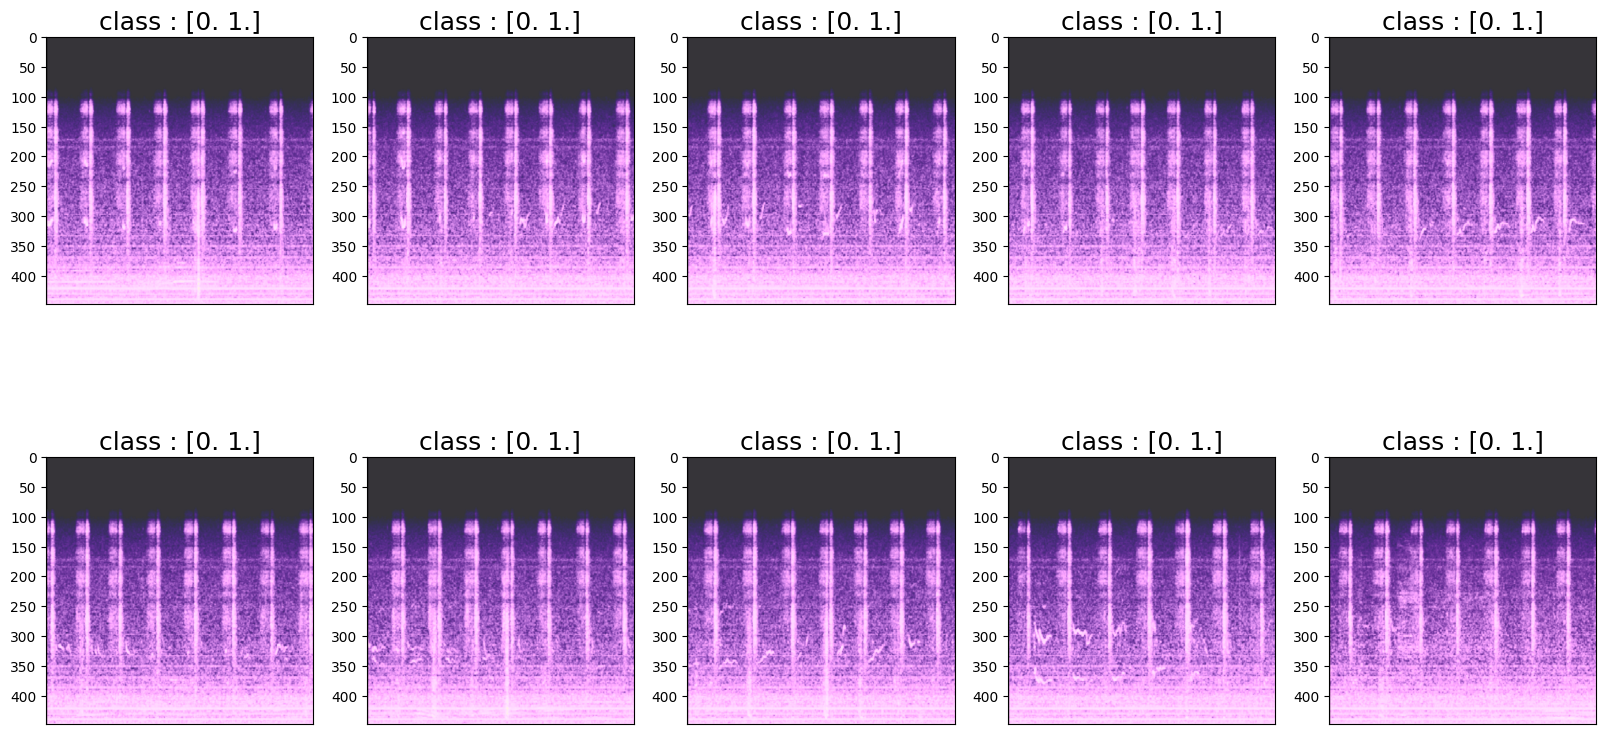

In [7]:
plt.figure(figsize=(20,10))
for i in range(10):
    ax = plt.subplot(2, 5, i+1)                                    
    plt.title("class : " + str(Y_train[3][i]), 
               fontsize=18)                                        
    plt.xticks([])                                                
    ax.imshow(X_train[0][i])    

In [8]:
# import tensorflow as tf
# from tensorflow.core.protobuf import rewriter_config_pb2
# from tensorflow.keras.backend import set_session
# tf.keras.backend.clear_session()  # For easy reset of notebook state.

# config_proto = tf.ConfigProto()
# off = rewriter_config_pb2.RewriterConfig.OFF
# config_proto.graph_options.rewrite_options.arithmetic_optimization = off
# session = tf.Session(config=config_proto)
# set_session(session)

In [9]:
from tensorflow.keras.layers import TimeDistributed, LSTM, Dense, Conv2D, MaxPool2D, Flatten, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Model

2023-02-13 22:02:52.243163: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 22:02:52.402923: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-13 22:02:52.443136: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-13 22:02:53.090086: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [10]:
def my_model(timesteps, height, width, color_channels, num_classes):
    
    input_batch = Input(shape = (timesteps, height, width, color_channels))
    
    
    cnn_network = TimeDistributed(Conv2D(64, (3,3), padding='same', activation='relu'))(input_batch)
    cnn_network = TimeDistributed(Conv2D(64, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(BatchNormalization())(cnn_network)
    cnn_network = TimeDistributed(MaxPool2D(pool_size=(2,2), padding='same', strides=(2,2)))(cnn_network)
    
    cnn_network = TimeDistributed(Conv2D(128, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(Conv2D(128, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(BatchNormalization())(cnn_network)
    cnn_network = TimeDistributed(MaxPool2D(pool_size=(2,2), padding='same', strides=(2,2)))(cnn_network)
    
    cnn_network = TimeDistributed(Conv2D(256, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(Conv2D(256, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(BatchNormalization())(cnn_network)
    cnn_network = TimeDistributed(MaxPool2D(pool_size=(2,2), padding='same', strides=(2,2)))(cnn_network)

    cnn_network = TimeDistributed(Conv2D(256, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(Conv2D(256, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(BatchNormalization())(cnn_network)
    cnn_network = TimeDistributed(MaxPool2D(pool_size=(2,2), padding='same', strides=(2,2)))(cnn_network)
    
    cnn_network = TimeDistributed(Conv2D(512, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(Conv2D(512, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(BatchNormalization())(cnn_network)
    cnn_network = TimeDistributed(MaxPool2D(pool_size=(2,2), padding='same', strides=(2,2)))(cnn_network)
    
    cnn_network = TimeDistributed(Conv2D(512, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(Conv2D(512, (3,3), padding='same', activation='relu'))(cnn_network)
    cnn_network = TimeDistributed(BatchNormalization())(cnn_network)
    cnn_network = TimeDistributed(MaxPool2D(pool_size=(2,2), padding='same', strides=(2,2)))(cnn_network)
    
    
    cnn_network = TimeDistributed(Flatten())(cnn_network)
   
    
    lstm_network = LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)(cnn_network)
    lstm_network = LSTM(25, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)(lstm_network)
    lstm_network = Dense(64,activation='relu')(lstm_network)
    lstm_network = Dropout(0.4)(lstm_network)
    lstm_network = Dense(32,activation='relu')(lstm_network)
    lstm_network = Dropout(0.4)(lstm_network)
    lstm_network = Dense(16,activation='relu')(lstm_network)
    lstm_network = Dropout(0.4)(lstm_network)
    lstm_network = TimeDistributed(Dense(num_classes, activation='softmax'))(lstm_network)

    
    full_network = Model(input_batch, lstm_network)
    return full_network


In [11]:
model = my_model(10,448,448,3,2)
model.compile(optimizer=Adam(learning_rate=1.25e-5),loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2023-02-13 22:02:54.225927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-13 22:02:56.900721: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 78963 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:12:00.0, compute capability: 8.0
2023-02-13 22:02:56.902162: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 78969 MB memory:  -> device: 1, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:13:00.0, compute capability: 8.0
2023-02-13 22:02:56.903424: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/r

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 448, 448, 3)  0         
                             ]                                   
                                                                 
 time_distributed (TimeDistr  (None, 10, 448, 448, 64)  1792     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 10, 448, 448, 64)  36928    
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 10, 448, 448, 64)  256      
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 10, 224, 224, 64)  0    

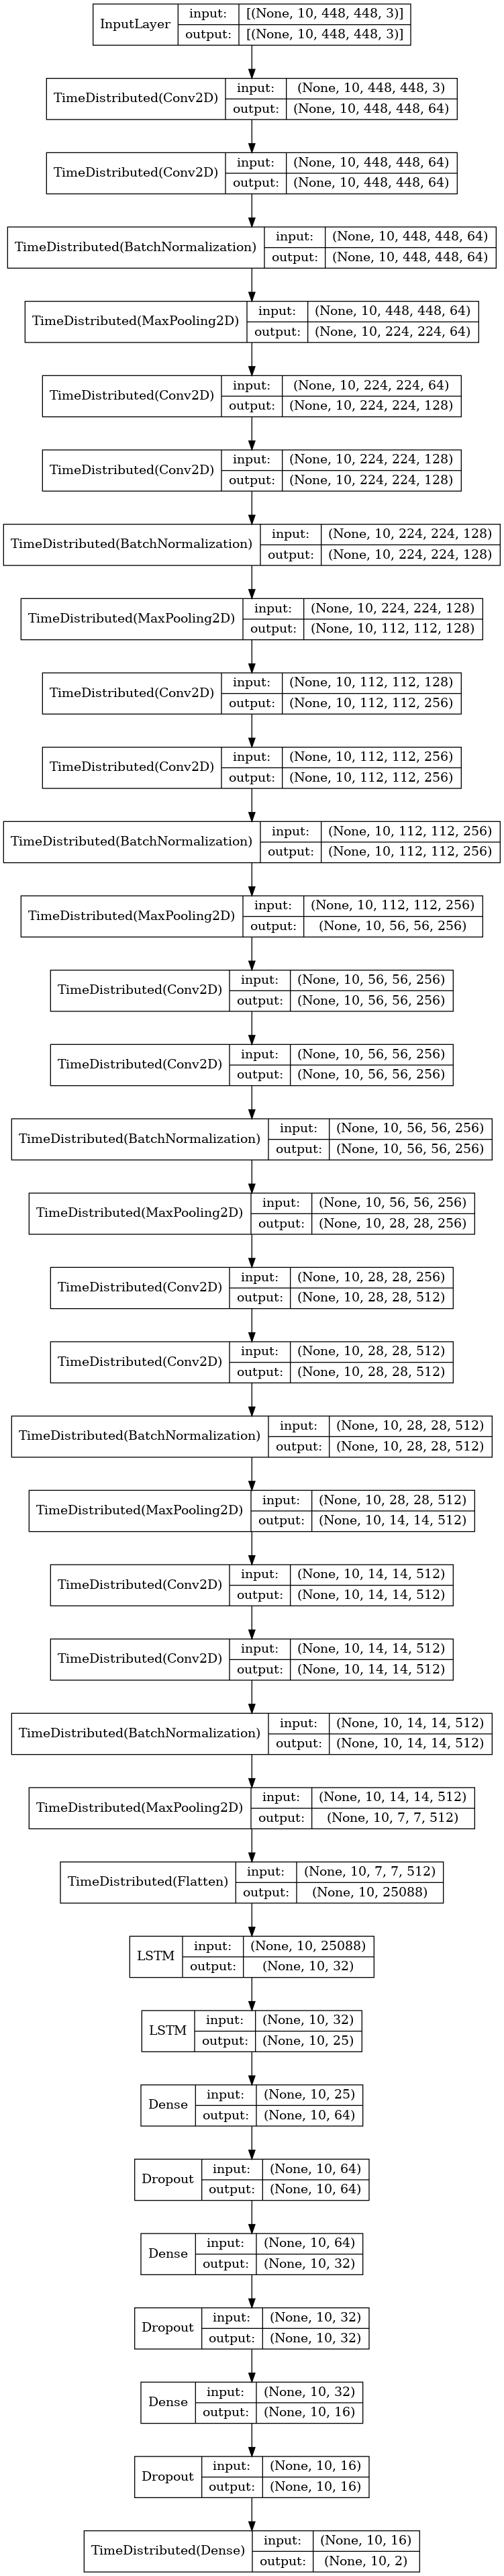

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model, 
           to_file=f'./Models/{model_name}.png',
           show_shapes=True,
           show_layer_names=False)

In [13]:
batch_sizes = 5 
num_epoch = 300
step_size_train = len(X_train)//batch_sizes
start_time = time.perf_counter()
model_history = model.fit(x = X_train,
                    y = Y_train, 
                    steps_per_epoch = step_size_train,
                    epochs=num_epoch,
                    validation_data = (X_valid, Y_valid),
                    callbacks = [EarlyStopping(monitor = 'val_loss',
                                               patience = 30,
                                               verbose = 1)]
                   )
print(f'Time: {time.perf_counter()-start_time} sec')

Epoch 1/300


2023-02-13 22:03:09.404854: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-13 22:03:10.671252: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8204


25/25 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.5047

2023-02-13 22:04:00.389361: W tensorflow/core/kernels/gpu_utils.cc:50] Failed to allocate memory for convolution redzone checking; skipping this check. This is benign and only means that we won't check cudnn for out-of-bounds reads and writes. This message will only be printed once.


25/25 [==============================] - 63s 819ms/step - loss: 0.6938 - accuracy: 0.5047 - val_loss: 0.6927 - val_accuracy: 0.5800
Epoch 2/300
25/25 [==============================] - 14s 578ms/step - loss: 0.6905 - accuracy: 0.5100 - val_loss: 0.6948 - val_accuracy: 0.3867
Epoch 3/300
25/25 [==============================] - 14s 549ms/step - loss: 0.6881 - accuracy: 0.5527 - val_loss: 0.6951 - val_accuracy: 0.3867
Epoch 4/300
25/25 [==============================] - 14s 552ms/step - loss: 0.6847 - accuracy: 0.5460 - val_loss: 0.6957 - val_accuracy: 0.3867
Epoch 5/300
25/25 [==============================] - 13s 537ms/step - loss: 0.6844 - accuracy: 0.5607 - val_loss: 0.6959 - val_accuracy: 0.3867
Epoch 6/300
25/25 [==============================] - 14s 547ms/step - loss: 0.6799 - accuracy: 0.5840 - val_loss: 0.6957 - val_accuracy: 0.3867
Epoch 7/300
25/25 [==============================] - 13s 536ms/step - loss: 0.6769 - accuracy: 0.6087 - val_loss: 0.6954 - val_accuracy: 0.3867
Epoc

25/25 [==============================] - 13s 507ms/step - loss: 0.5807 - accuracy: 0.7267 - val_loss: 0.5995 - val_accuracy: 0.6933
Epoch 58/300
25/25 [==============================] - 13s 508ms/step - loss: 0.5857 - accuracy: 0.7407 - val_loss: 0.6006 - val_accuracy: 0.6800
Epoch 59/300
25/25 [==============================] - 13s 521ms/step - loss: 0.6082 - accuracy: 0.7093 - val_loss: 0.6220 - val_accuracy: 0.5733
Epoch 60/300
25/25 [==============================] - 13s 532ms/step - loss: 0.5861 - accuracy: 0.7327 - val_loss: 0.5798 - val_accuracy: 0.7400
Epoch 61/300
25/25 [==============================] - 13s 511ms/step - loss: 0.5768 - accuracy: 0.7333 - val_loss: 0.5813 - val_accuracy: 0.7400
Epoch 62/300
25/25 [==============================] - 12s 498ms/step - loss: 0.5869 - accuracy: 0.7267 - val_loss: 0.6198 - val_accuracy: 0.6067
Epoch 63/300
25/25 [==============================] - 13s 526ms/step - loss: 0.5892 - accuracy: 0.7273 - val_loss: 0.5742 - val_accuracy: 0.740

25/25 [==============================] - 12s 498ms/step - loss: 0.4901 - accuracy: 0.8120 - val_loss: 0.6178 - val_accuracy: 0.6333
Epoch 113: early stopping
Time: 1503.090278800577 sec


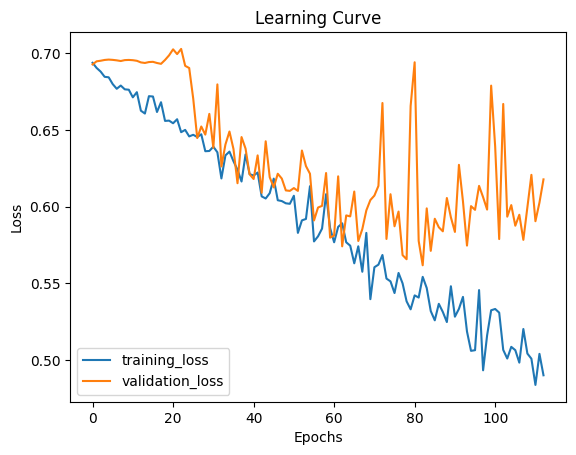

In [14]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

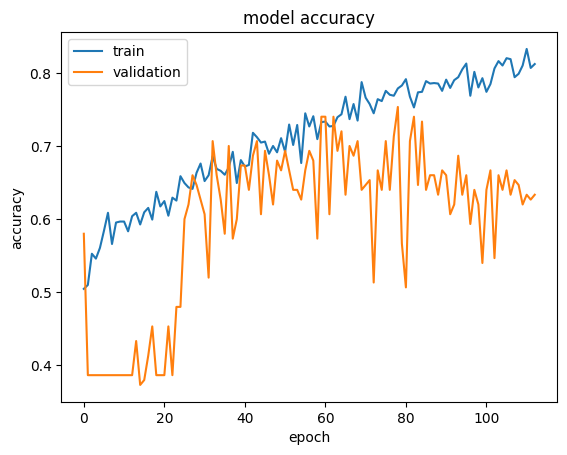

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
test_pred = model.evaluate(X_test, Y_test)
print("test loss, test acc:", test_pred)

1/1 [==============================] - 0s 461ms/step - loss: 0.5222 - accuracy: 0.7867
test loss, test acc: [0.5221561193466187, 0.7866666913032532]


In [17]:
predictions = model.predict(X_test)
print("predictions: ")
print(predictions)
print("answer : ")
print(Y_test)

1/1 [==============================] - 1s 1s/step
predictions: 
[[[0.45338884 0.5466112 ]
  [0.41146654 0.5885335 ]
  [0.38425174 0.6157482 ]
  [0.3727421  0.62725794]
  [0.36540133 0.63459873]
  [0.355982   0.644018  ]
  [0.35094917 0.64905083]
  [0.3446427  0.6553573 ]
  [0.34154716 0.65845287]
  [0.3363225  0.6636775 ]]

 [[0.5645476  0.43545237]
  [0.5827345  0.4172655 ]
  [0.6074688  0.39253122]
  [0.6211811  0.37881893]
  [0.61263067 0.38736933]
  [0.6352677  0.36473233]
  [0.6102332  0.38976678]
  [0.6095916  0.39040846]
  [0.4458694  0.5541306 ]
  [0.39344537 0.6065546 ]]

 [[0.45465675 0.5453432 ]
  [0.52326834 0.4767317 ]
  [0.59084105 0.40915895]
  [0.6117299  0.38827005]
  [0.61820114 0.38179886]
  [0.62784207 0.37215793]
  [0.6696705  0.33032945]
  [0.6597435  0.34025648]
  [0.6722085  0.3277915 ]
  [0.67243016 0.32756978]]

 [[0.4186529  0.58134717]
  [0.36017296 0.639827  ]
  [0.32705945 0.67294055]
  [0.3091979  0.69080216]
  [0.29895025 0.7010497 ]
  [0.29320636 0.7067

ROC_AUC_Score: 0.8217317487266552



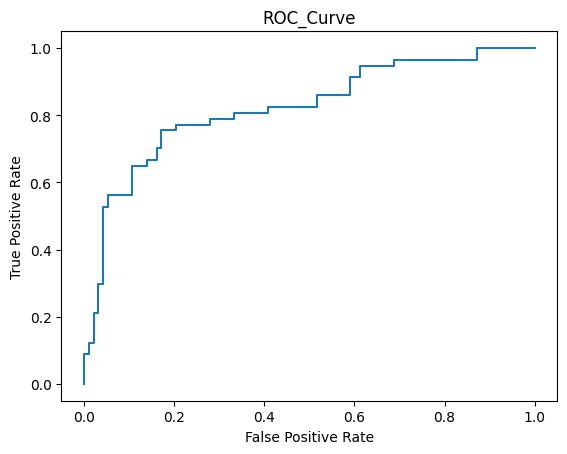

In [18]:
import sklearn.metrics

print(f'ROC_AUC_Score: {sklearn.metrics.roc_auc_score(Y_test[:,:,1].reshape(-1), predictions[:,:,1].reshape(-1))}')
print()
fpr, tpr, _ = sklearn.metrics.roc_curve(Y_test[:,:,1].reshape(-1), predictions[:,:,1].reshape(-1))
plt.plot(fpr, tpr)
plt.title('ROC_Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [19]:
predictions = predictions.reshape(150, -1).argmax(-1)
print('Confusion Matrix: ')
print(sklearn.metrics.confusion_matrix(Y_test.reshape(150,-1).argmax(-1), predictions, labels=[0,1]))
print()
print(f'Cohen_Kappa_Score: {sklearn.metrics.cohen_kappa_score(Y_test.reshape(150,-1).argmax(-1), predictions)}')

Confusion Matrix: 
[[74 19]
 [13 44]]

Cohen_Kappa_Score: 0.5562950637825845


In [20]:
#model.save("./Models/{model_name}.h5")